In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
%matplotlib inline

In [2]:
#Load the dataset here. Ensure data path is correct #
df = pd.read_csv("health care diabetes.csv") 

##Data Exploration: Week 1

####1. Perform descriptive analysis. Understand the variables and their corresponding values.On the columns below, a value of zero does not make sense and thus indicates missing value:
1. Glucose
2. BloodPressure
3. SkinThickness
4. Insulin
5. BMI

In [3]:
print (df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Describe provides us quick snapshot of the key statistics for the data.
# We can analyse mean and median/q2(50%) and Standard deviation and the idea of range from min and max values. 
# Also very easy to see if any columns have na's . In this case there is no nan in columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Analysing columns 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' for 0 values 


In [7]:
analyse_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
df_copy = df.copy()
df_copy[analyse_columns] = df_copy[analyse_columns].replace(0,np.nan) # replace the 0 with na which makes it easier to check null values

In [8]:
df_copy[analyse_columns].isna().sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [9]:
df_copy[analyse_columns].isna().sum()/df_copy.shape[0]*100 # checking percentage of missing values for each colum

Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
BMI               1.432292
dtype: float64

####2. Visually explore these variables using histograms. Treat the missing values accordingly.

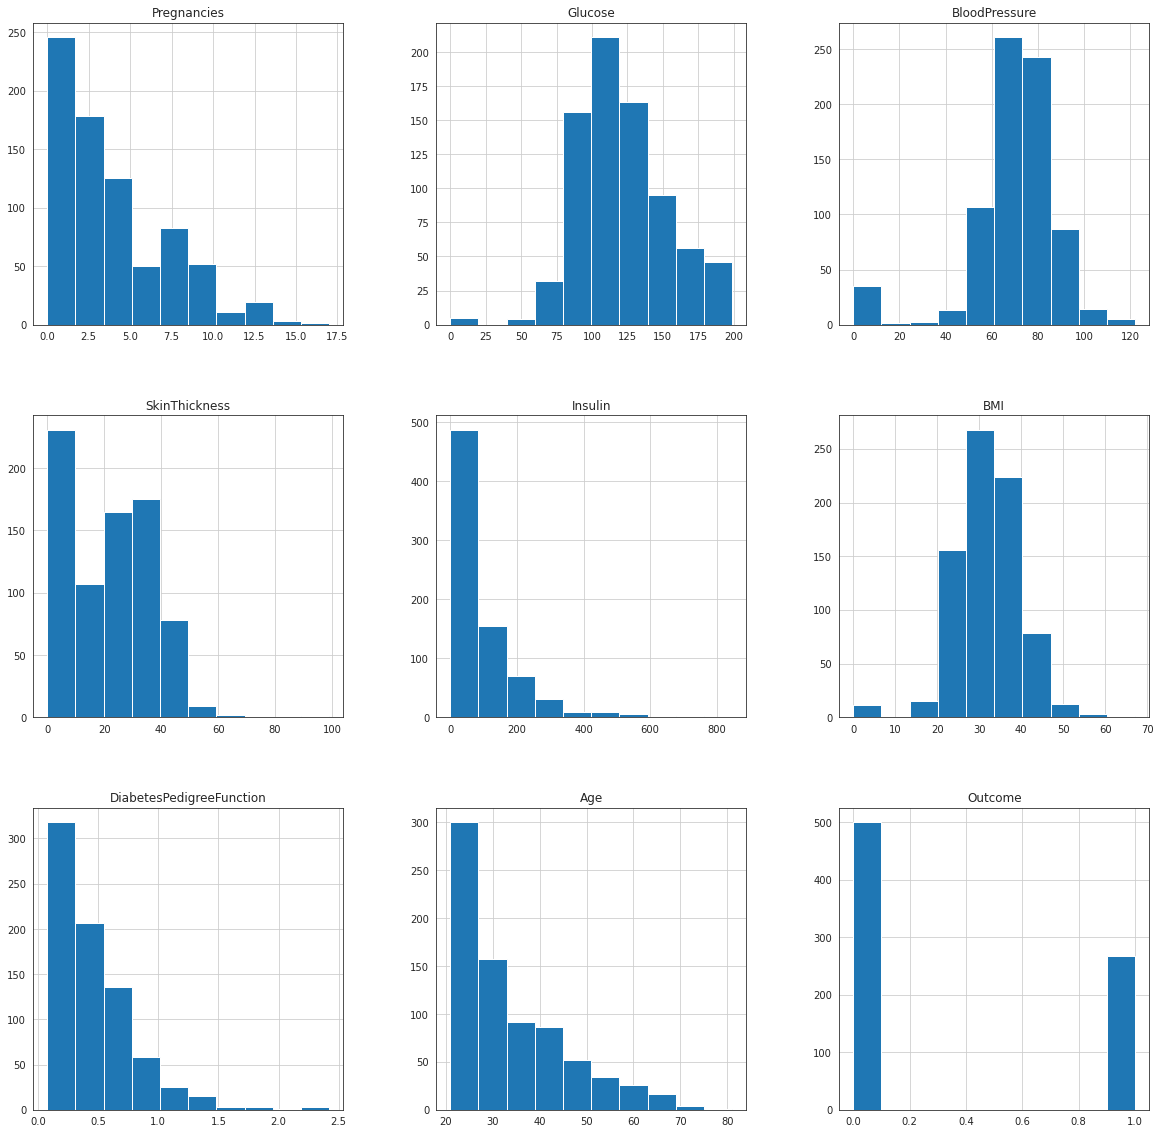

In [10]:
p = df.hist(figsize=(20,20))

##### Missing value treament: 
As per the Histogram we can note the skewness and distributions of the individual features. To fill the missing data we could utilize the mean or median to impute the na's depending on whether the distribution has a high level of skewness or less skewness (tending towards a normal dist).

##### Rule: 
* If there is more skewness then we could use the median imputation as the mean in a skewed data set is influenced by extreme values
* If there is less skewness then we perform imputation using the mean of the column 

##### Analysis: 
Note that in above distributions we must ignore the 0 values for columns 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'.
<br>
Based on the above frequency/histogram distributions we have made the following decision for imputation.
1. SkinThickness and Insulin have a high level of skewness. Hence we can impute these using the median.
2. Also there is little skewness in features BMI and Glucose. We shall impute these using the median again based on the above defined rule. *Note: for these two features the mean imputation would have also worked fine based on the fact that less proportion (< than 1.5%) of the total data is missing and the skewness is less for the Glucose and BMI columns.*
3.  Lastly for BloodPressure we can see the data distribution has very little skewness and it looks quite symmetrical. Here we will proceed with mean imputation.


In [11]:
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)
df_copy['Glucose'].fillna(df_copy['Glucose'].median(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)

Plotting the histogram after treating (imputation) of the missing values

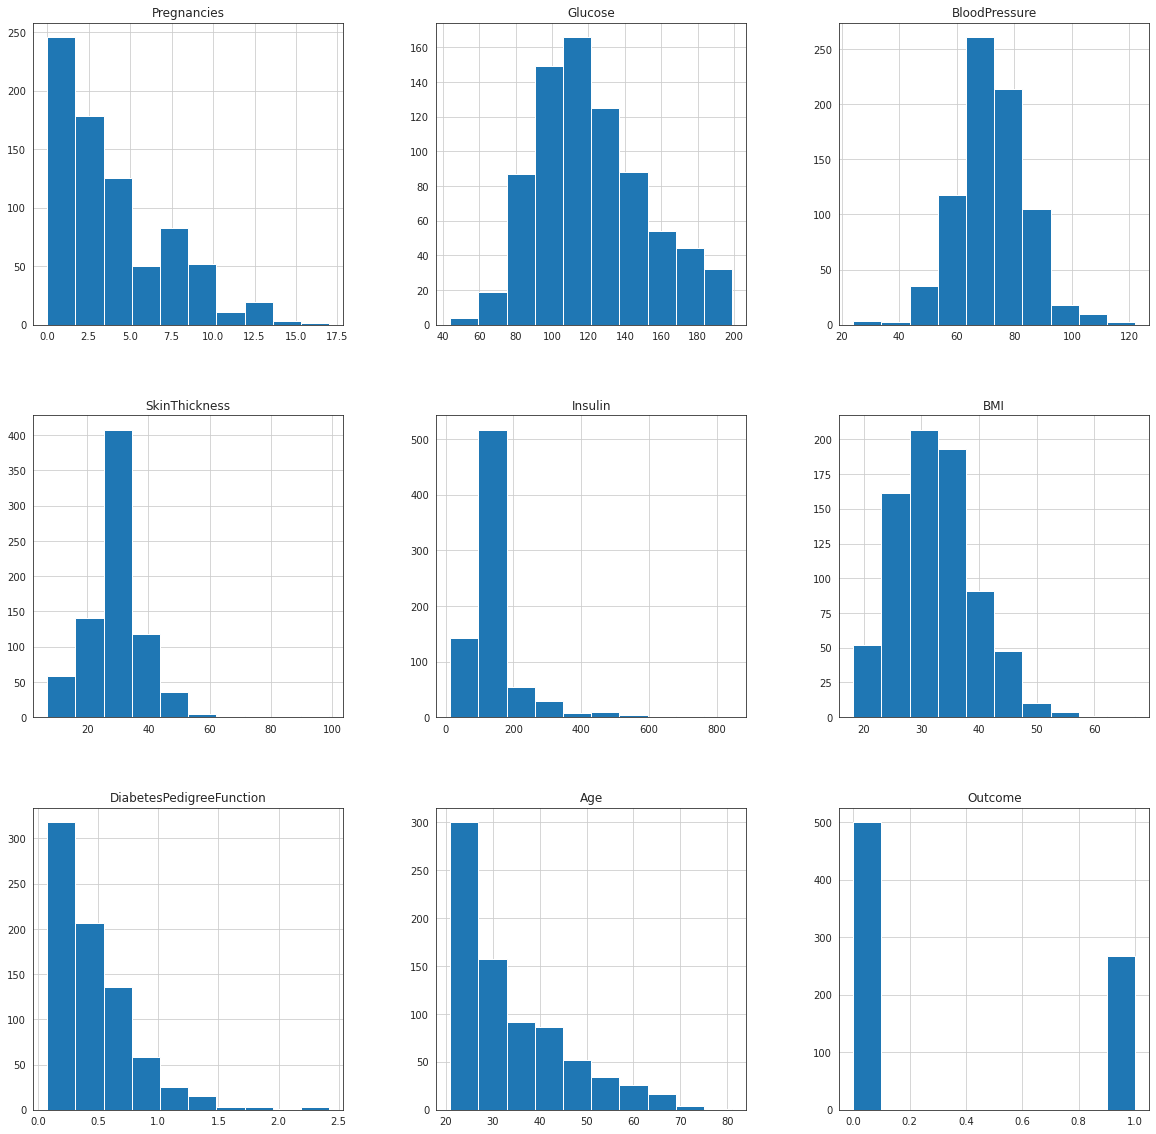

In [12]:
p = df_copy.hist(figsize=(20,20))

In [13]:
df_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


####3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.

Text(0, 0.5, 'Dtype')

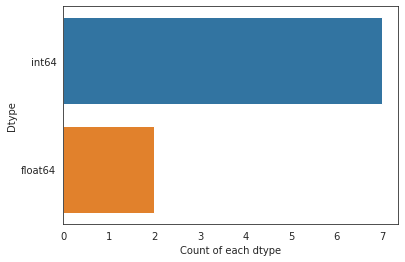

In [14]:
data_types = df.dtypes.astype("string")
p = sns.countplot(y = data_types)
plt.xlabel("Count of each dtype")
plt.ylabel("Dtype")

##Data Exploration:  Week 2

####1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

0    500
1    268
Name: Outcome, dtype: int64


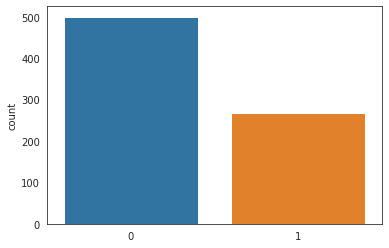

In [15]:
print(df.Outcome.value_counts())
p = sns.countplot(x = df.Outcome.values)

In [16]:
# Sampling percentage split of the 2 classes present in the data
df.Outcome.value_counts()/df.shape[0]*100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

Findings:

We can see that the samples for the two classes are not equal and the data is biased to the Non-diabetic class.  
Class 0(Non diabetic) is 65% and Class 1(Diabetic) is 35% approx. 
* We would prefer the model to successfully detect the presence of diabetes which is the minority class in this data.
* There would be a possibility of the model being biased towards majority Class 0(Non diabetic) and may not show good accuracy on the minority class with diabetes. 
* If the model remains biased to the majority class and does not have good performance on minority class(diabetic), then people with diabetes would be undiagnosed which would be a severe outcome that we should avoid.

Plan:

In this case, we need to balance the data using any oversampling for minority class or undersampling for majority class. 
* While pre-processing, we can apply the SMOTE method for balancing the samples and review which of the resulting models are able to perform better based on the performance metrics like accuracy score, recall score, sensitivity, auc_score etc.
* Performing the balancing would help to ensure that we have less bias from the models based on the distribution of data labels in the original data. Further as mentioned before this would help ensure that the diabetic cases are identified more accurately which is the goal we would aim for in this problem.

####2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

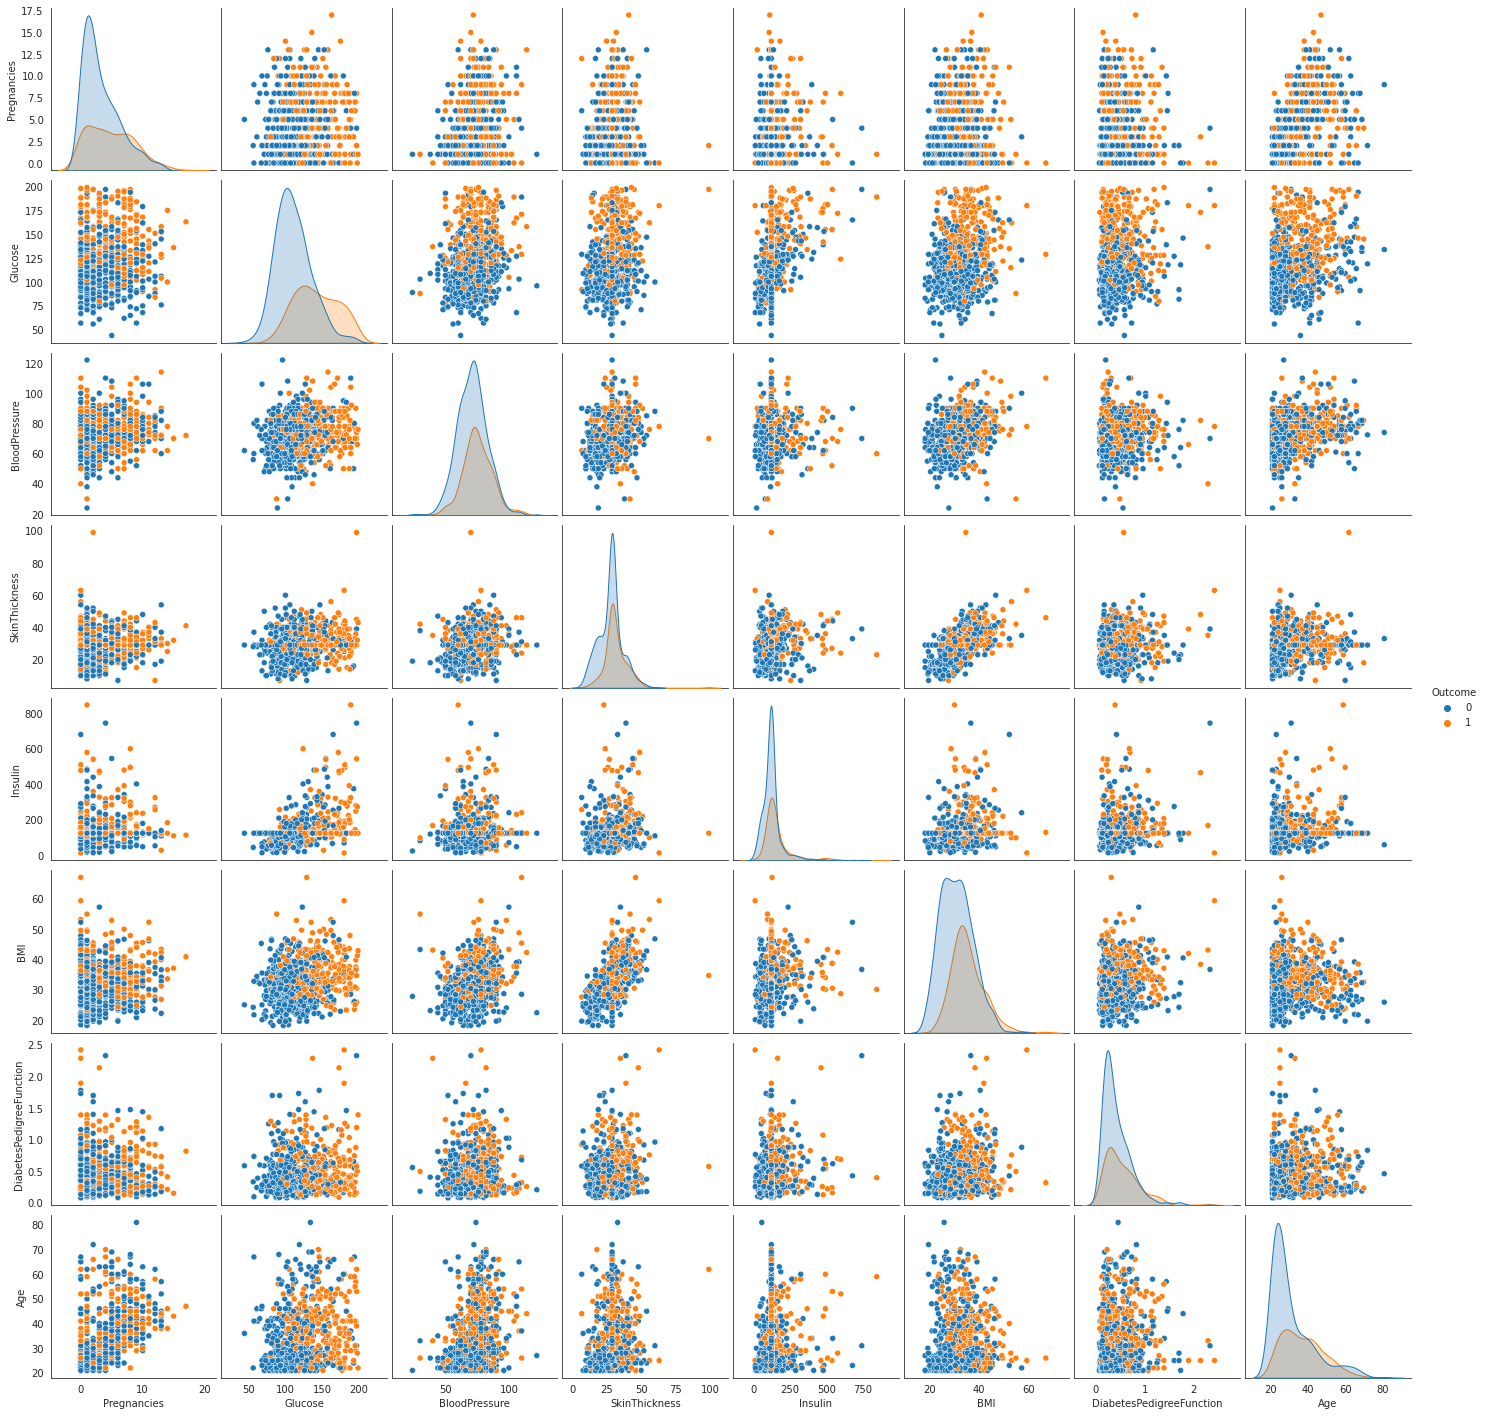

In [17]:
sns.pairplot(df_copy, hue ="Outcome")

Findings:

The pairplot shows the scatter plots for the various combinations of features.
It helps us see if variables have any pattern. i.e. Indicating a degree of correlation if any exists between that pair.<br>
The pair-plots in the above output were also color coded as per outcome. The color coding shows the level of seperation of the two classes as well based on the matrix of values of the two features in each scatter plot. 

Observations:

1. Most features do not show any strong correlation or patterns from the scatter plots. 
2. Only the following feature-pairs (BMI and SkinThickness) and (Glucose and Insulin) show some level of positive correlation
3. Class seperation(Diabetic vs non diabetic) looks better in pairs containing "Glucose" as a feature. This could imply that the feature would contribute more to the classification and be a significant part of the model.

####3. Perform correlation analysis. Visually explore it using a heat map.

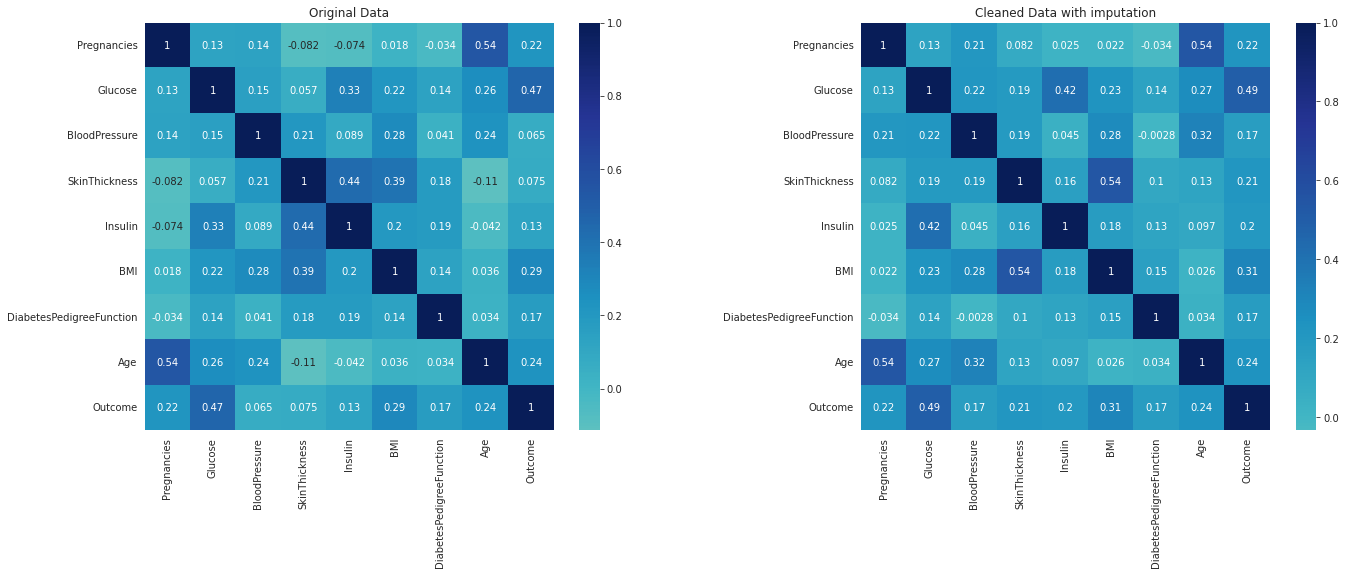

In [18]:
plt.figure(figsize=(22,18))
plt.subplot(221)
plt.title("Original Data")
sns.heatmap(df.corr(),annot=True, cmap = "YlGnBu",center = 0.0)
plt.subplot(222)
plt.autoscale()
plt.title("Cleaned Data with imputation")
sns.heatmap(df_copy.corr(),annot =True,cmap="YlGnBu",center = 0.0)
plt.subplots_adjust(wspace=0.4, 
                    hspace=0.4)

As mentioned in the pairplot analysis the variable Glucose has the highest correlation to outcome

In [19]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


##Data Modeling: Week 3


####1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

#####**Guideline/Main Approach** : 

---

For this problem, as it is true in the case of most other medical applications of classification algorithms we would want a model to ensure that we are able to correctly identify the cases where persons have the disease correctly.
So based on this we can infer the severity of the 4 classification outcomes as follows
* 🟢 True positive – A person we told has diabetes, and actually was diabetic -  CORRECT / DESIRED MODEL OUTPUT
* 🟢 True negative – A person we told was not diabetic, and really was not diabetic - CORRECT / DESIRED MODEL OUTPUT.
* 🟠 False positive – a person we told is diabetic, though they really are not diabetic - INCORRECT / FALSE ALARM <br>*But this is not the worst case as person is actually healthy. While this is also not desired it is more of an inconvenience which can may be eliminated by things like a second more robust test or a future test taken by the person rules out diabetes*.
* 🔴 **False negative** – A person we told is not diabetic, but is actually having diabetes -  INCORRECT / WORST CASE <br> *This makes for a worse situation as we gave a false signal to a person who requires treatment. If left untreated or untested this may lead to more health complications and severe consequences*

So based on the framework for this problem our aim should be to have a model where we are able to reduce the false-negatives as much as possible making the recall-score(sensitivity a more important factor) when making decisions for model selection


---



#####**Model building Strategy**: 


---


We can build a classification model using the following classification algorithms
1. K-Nearest Neighbors
2. Logistic regression
3. Naive Bayes
4. Support Vector Machine
5. Decision Tree
6. Random Forest
7. XG-Boost

Validation Framework:
* As per the overall framework we want to ensure that we reduce the amount of false-negative cases as much as possible, since the false negatives are the worst case scenario. Hence apart from the overall accuracy score, we would also want to ensure that model has a good sensitivity towards the diabetic cases. So the models must have a good balance of recall with accuracy in the evaluation process. Therefore the accuracy and recall score will become the primary metrics to measure model performance in our approach.
* Validation of model will be performed using the accuracy and recall score metrics by the K-fold cross validation technique first to see which of the models show a good average performance on the train data. 
* Further the test(validation) split will serve as a second evaluation step after the k-fold cross validation process to again ensure the model has sufficient accuracy and recall on test data. 
* Final model selected will be based on the model performance as per the test
(validation) data and performance on the train data during k-fold cross validation.  

*Note: The final model should have good performance in the k-fold cross validation stage as well and not just best in second step on the test data. In case the model works well on the test data but not have a good average performance on k-fold validation step, then that could mean the model performance was improved due to the nature of the test data set and not due to the model's overall/general performance on average using different splits from the same dataset. K-fold helps to ensure that model selected actually has a more consistent performance and was not just lucky to have got a better score on the final test/validation data but has poorer performance in general for the same problem and data*

Approach:
1. As discussed before first we need to perform resampling using SMOTE so that the classes(diabetic - 1 and non-diabetic - 0) are balanced in the data. 
2. Next we will split the data into Train-test(validation) split. The split will be done with a stratified sampling method to ensure that the splits retain the class distribution or proportion of samples for both classes. This step is done first to ensure there is no data leakage on the following steps where we will test models again using the validation data-set to decide the optimum model. 
3. Before we proceed with the model building. We would need to ensure that data is scaled uniformly. We will perform standard scaling as a final pre-processing step before building any models. This is required to bring all the features to the same scale especially beneficial for applying distance based algorithms like KNN.
4. Next we shall proceed with model building. First we will build a model on KNN algorithm as a baseline with the best value of n through GridSearchCV. 
5. Next we can run the K-Fold cross validation using the training data for the various other models to be tested on the classification problem. This should give us a idea of the overall performance of the models on multiple samples picked randomly from the train data.
6. Finally we can again test the models on the validation data to analyse the classification model(s) with the best possible accuracy and recall. Model scores will be compared with scores from the KNN alogrithm identified in step 3.
7. Lastly the final model is selected based on the validation criteria (i.e. best accuracy and recall) on test data along with good results on the train data during k-fold cross validation . Model also needs to be evaluated using various other metrics like f-1 score, confusion matrix and classification summary with auc score(roc curve), sensitivity and specificity metrics. 


---


####Pre-processing data for model creation

#####Step 1 : Performing the class balancing for the data using SMOTE

In [20]:
# Importing necessary functions/classes for the pre-processing of data
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

seed = 477 #Setting seed for output with same random-state

In [21]:
# Seperating the features and labels(Outcome)
X = df_copy.iloc[:,:8]
y = df_copy.iloc[:,8]
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [22]:
# Using SMOTE to balance the data classes(labels)
smote = SMOTE(random_state=seed)
X_resampled,y_resampled = smote.fit_resample(X,y)

#####Step 2 : Performing the train-test(validation) split on the dataset. Selecting a 80-20 split for the data

In [23]:
X_train, X_validation, y_train, y_validation = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=seed,stratify=y_resampled)

In [24]:
print(X_train.shape)
print(X_validation.shape)
print(y_train.shape)
print(y_validation.shape)

(800, 8)
(200, 8)
(800,)
(200,)


#####Step 3 : Applying standard scaling on the data

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation) # Note we must apply same transformation on the test data set. Hence this was not fit_transform


####2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

In [26]:
# import models and cross_val_score and stratified-kfold for the model and parameter analysis
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# import all final evaluation metrics for the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, auc
from sklearn.metrics import roc_curve

#####Step 4 : Creating and training a KNN reference algorithm and selecting the best value of n_neighbors parameter of KNN using GridSearchCV

In [27]:
# Creating a base KNN model and using Grid search - CV to find the best value of k(n_neighbors) on training data
param_grid = {'n_neighbors':list(range(1,26))
              }
knnclassifier = KNeighborsClassifier()
gridcv = GridSearchCV(knnclassifier, param_grid=param_grid, scoring = ["accuracy","recall_macro"], cv = 10,refit=False)
gridcv.fit(X_train_scaled,y_train)
bestk_results = pd.DataFrame(gridcv.cv_results_) # saving the gridsearchCv results to a dataframe
bestk_results = bestk_results.sort_values(by=["rank_test_recall_macro","rank_test_accuracy"])
bestk_results = (bestk_results.set_index(bestk_results.rank_test_recall_macro)).rename_axis("rank")

#top 10 best performing values of k as per GridSearchCV on train data
bestk_results[["param_n_neighbors","mean_test_accuracy","mean_test_recall_macro","std_test_recall_macro"]][:10] 

,param_n_neighbors,mean_test_accuracy,mean_test_recall_macro,std_test_recall_macro
rank,,,,
1,1,0.77625,0.77625,0.047909
2,3,0.77000,0.77000,0.045484
3,13,0.76625,0.76625,0.041098
4,11,0.76500,0.76500,0.031524
5,12,0.76375,0.76375,0.036849
6,5,0.76250,0.76250,0.052440
6,9,0.76250,0.76250,0.045415
8,17,0.76125,0.76125,0.037687
8,10,0.76125,0.76125,0.039310


As per the Grid search we note the best performance is for k = 1 .
However we shall now analyse this using the best 10 values of k on the final validation data. 
Finally we select the one which results in the best accuracy on the validation set.


In [28]:
# Testing the best 10 values of k from GridSearch on the validation data
best_ns = bestk_results["param_n_neighbors"][:10]
n_neighbors = []
acc_scores = []
recall_scores = []
for k in best_ns:
  knnclassifier = KNeighborsClassifier(k)
  knnclassifier.fit(X_train_scaled,y_train)
  y_pred = knnclassifier.predict(X_validation_scaled)
  n_neighbors.append(k)
  acc_scores.append(knnclassifier.score(X_validation_scaled,y_validation))
  recall_scores.append(recall_score(y_validation,y_pred)) 

combined_score = (np.array(recall_scores)+np.array(acc_scores))/2    
best_n_results = pd.DataFrame(list(zip(n_neighbors,acc_scores,recall_scores,combined_score)),
                              columns=["K","Accuracy Score","Recall","Combined_Score"])
best_n_results = best_n_results.sort_values(by=["Combined_Score"],ascending=False)
best_n_results.reset_index(drop=True,inplace=True)
best_n = best_n_results["K"][0]
print("Best n = %d" %(best_n))
best_n_results

Best n = 17


,K,Accuracy Score,Recall,Combined_Score
0,17,0.815,0.89,0.8525
1,3,0.785,0.90,0.8425
2,5,0.795,0.88,0.8375
3,9,0.800,0.87,0.8350
4,10,0.815,0.85,0.8325
5,13,0.800,0.86,0.8300
6,11,0.795,0.86,0.8275
7,12,0.800,0.84,0.8200
8,7,0.775,0.84,0.8075
9,1,0.755,0.85,0.8025


As per above analysis the best recall score is at k=3 and accuracy score is best at K=17 on the test data. 
The best combination is at k = 17 which has the best balance of both accuracy and recall and hence has the highest combined score

Performance for k = 17 was on average 76.12% in the Gridsearch Cross validation method. Note that k=17 had lower Standard deviation in scores under Grid search CV
So we will proceed with KNN model where k(n_neighbors) or best_n = 17

#####Step 5 : Comparing other algorithms to the KNN reference algorithm (best_n=17) using K fold Cross validation for overall model accuracy on average using train data.

In [29]:
# Creating list of models to be compared
models = []
models.append(('KNN_REF', KNeighborsClassifier(best_n)))
models.append(('LOGREG', LogisticRegression(random_state=seed,max_iter=1000)))
models.append(('CART', DecisionTreeClassifier(random_state=seed)))
models.append(('NBAY', GaussianNB()))
models.append(('SVM', SVC(gamma='auto',random_state=seed)))
models.append(('RANDF',RandomForestClassifier(random_state=seed)))
models.append(('XGB',XGBClassifier(random_state=seed)))

In [30]:
# Evaluate each model using K-fold validation
accuracy = []
recalls = []
recall_std = []
names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10,random_state=seed,shuffle=True)
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
  cv_recall_results = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='recall_macro')
  accuracy.append(cv_results.mean())
  recalls.append(cv_recall_results.mean())
  recall_std.append(cv_recall_results.std())
  names.append(name)

kfold_compare_model_results = pd.DataFrame(list(zip(names,accuracy,recalls,recall_std)),columns = ["Model","Accuracy","Recall","Recall_std"])
kfold_compare_model_results = kfold_compare_model_results.sort_values(by=["Recall","Accuracy"],ascending=False)
kfold_compare_model_results.reset_index(drop=True,inplace=True)
kfold_compare_model_results 

,Model,Accuracy,Recall,Recall_std
0,RANDF,0.80000,0.80000,0.053619
1,XGB,0.79250,0.79250,0.049434
2,SVM,0.79125,0.79125,0.046787
3,KNN_REF,0.76125,0.76125,0.031844
4,CART,0.75000,0.75000,0.039922
5,LOGREG,0.73000,0.73000,0.050990
6,NBAY,0.71250,0.71250,0.058896


Based on the K-fold cross Cross validation
1. Random Forest, XGB and SVM were top 3 in the average score.
2. Note the Standard deviation of the scores was lesser for KNN

#####Step 6 : Finally we will test the models on the test(validation) data to see which ones yield the best accuracy. Compare the results with KNN algorithm

In [31]:
accuracy = []
recalls = []
names = []
for name, model in models:
  model.fit(X_train_scaled,y_train)
  y_pred = model.predict(X_validation_scaled)
  accuracy.append(accuracy_score(y_validation,y_pred))
  recalls.append(recall_score(y_validation,y_pred,pos_label=1))
  names.append(name)

combined_score = (np.array(recalls)+np.array(accuracy))/2    
test_data_results = pd.DataFrame(list(zip(names,accuracy,recalls,combined_score)),columns = ["Model","Accuracy","Recall","Combined_Score"])
test_data_results = test_data_results.sort_values(by=["Combined_Score"],ascending=False)
test_data_results.reset_index(drop=True,inplace=True)
test_data_results 

,Model,Accuracy,Recall,Combined_Score
0,RANDF,0.885,0.92,0.9025
1,XGB,0.860,0.94,0.9000
2,KNN_REF,0.815,0.89,0.8525
3,SVM,0.825,0.88,0.8525
4,CART,0.810,0.84,0.8250
5,LOGREG,0.825,0.82,0.8225
6,NBAY,0.795,0.77,0.7825


Findings : 
* Random Forest Model has the best Combined score on Validation data and this result is consistent with the results from previous K-fold cross validation on train data. XGB was again second best on combined score, although we see XGB actually has better recall but Random forest had better accuracy overall leading to the slightly better combined score. 
* Again the next 2 best performing models were SVM which is 4th on the and KNN now has the 3rd best combined score on the (test)validation data due to it getting better recall than SVM.
* So overall we can see that Random forest gives us the best mix of accuracy with recall.
* We will shortlist the following 3 models Random Forest, XGBoost and K-Nearest Neighbors Classifier for the next step of analysis. 

In the next step we will further analyse the recall, sensitivity, specificity,auc_score(ROC curve)  and f-1 scores to decide the final model.

##Data Modeling: Week 4

####1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

#####Step 7 : Selection of best or optimal model - As per the above analysis Random Forest, XGBoost and KNNearest Neighbors had the best scores. We can further analyse the confusion matrix and classification report metrics for these models to compare which one would be more preferable. 

In [32]:
best_models = [] 
best_models.append(('RF',RandomForestClassifier(random_state=seed)))
best_models.append(('XGB',XGBClassifier(random_state=seed)))
best_models.append(('KNN',KNeighborsClassifier(best_n)))

In [33]:
def fit_pred(model):
  model.fit(X_train_scaled,y_train)
  y_pred = model.predict(X_validation_scaled)
  y_pred_proba = model.predict_proba(X_validation_scaled)[:,1]
  return y_pred,y_pred_proba 

######Part 1 - Creating the confusion matrix for the models to visualize the count of the possible model outcomes : True Positives (TP) , False Positives (FP) ,  True Negtives (TN) , False Negatives (FN) .

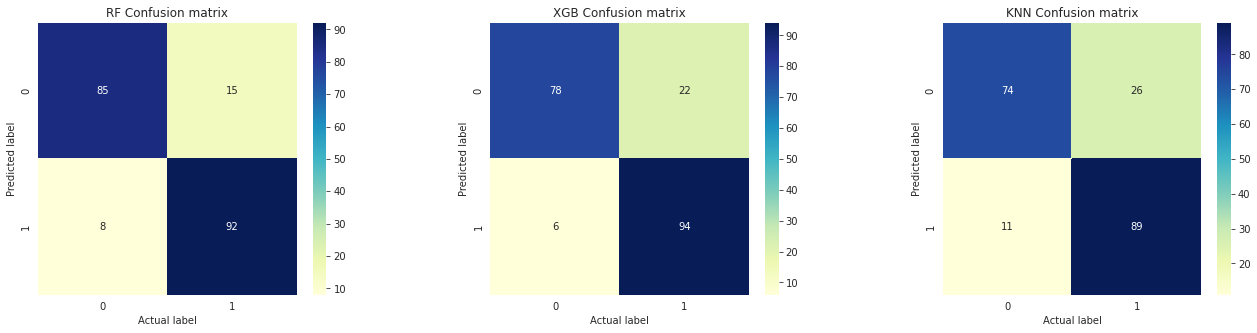

In [34]:
fig, axs = plt.subplots(1,3, figsize=(22,5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=.4)
line_width = 2
axs = axs.ravel()

for i,models in list(enumerate(best_models)):
  name,model = models[0],models[1]
  y_pred,y_pred_proba = fit_pred(model)
  cnf_matrix = confusion_matrix(y_validation,y_pred)
  sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g',ax = axs[i])
  axs[i].set_title('%s Confusion matrix' %(name), y=1.1)
  axs[i].set_xlabel("Actual label")
  axs[i].set_ylabel("Predicted label")
  
plt.show()

######Part 2 - Building the classification report from sklearn which contains metrics like precision, recall, f-1 score and overall accuracy

In [35]:
for name,model in best_models:
  y_pred,y_pred_proba = fit_pred(model)
  print("\n Classification report for %s: "%(name))
  print(classification_report(y_validation,y_pred))


 Classification report for RF: 
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       100
           1       0.86      0.92      0.89       100

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200


 Classification report for XGB: 
              precision    recall  f1-score   support

           0       0.93      0.78      0.85       100
           1       0.81      0.94      0.87       100

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200


 Classification report for KNN: 
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       100
           1       0.77      0.89      0.83       100

    accuracy                           0.81       200
   macro avg       0.82    

Analysis: 
F-1 score is a more balanced metric and takes into account and finds a balance between both the precision and recall.
Random forest has the best f-1 score again as it balances the recall and precision for both classes optimally. While also ensuring a good recall score on both the classes. 


######Part-3 - Creating custom classification report by analyzing sensitivity, specificity, AUC (ROC curve),

In [36]:
# Classification report 

names = []
auc_scores = []
sensitivity_scores = []
specificity_scores = []

for name,model in best_models:
  y_pred,y_pred_proba = fit_pred(model)
  auc_score = roc_auc_score(y_validation,y_pred_proba)
  sensitivity = recall_score(y_validation,y_pred,pos_label=1,average='binary')
  specificity = recall_score(y_validation,y_pred,pos_label=0,average='binary')
  names.append(name)
  auc_scores.append(auc_score*100)
  sensitivity_scores.append(sensitivity*100)
  specificity_scores.append(specificity*100)
  
classify_metrics_df = pd.DataFrame(list(zip(names,auc_scores,sensitivity_scores,specificity_scores)),
                                   columns=["Model","AUC","Sensitivity","Specificity"])

Plotting ROC Curves for the models

In [37]:
def roc_plotter(axs,fpr,tpr,line_width,name):
  axs.plot([0,1],[0,1],color="navy", lw=line_width,linestyle ='--')
  axs.plot(fpr,tpr, color="darkorange", lw = line_width,label="ROC curve (area = %0.2f)" % roc_auc)
  axs.set_xlabel('False positive rate')
  axs.set_ylabel('True positive rate')
  axs.set_title('%s ROC curve' %(name))
  axs.legend(loc="lower right")

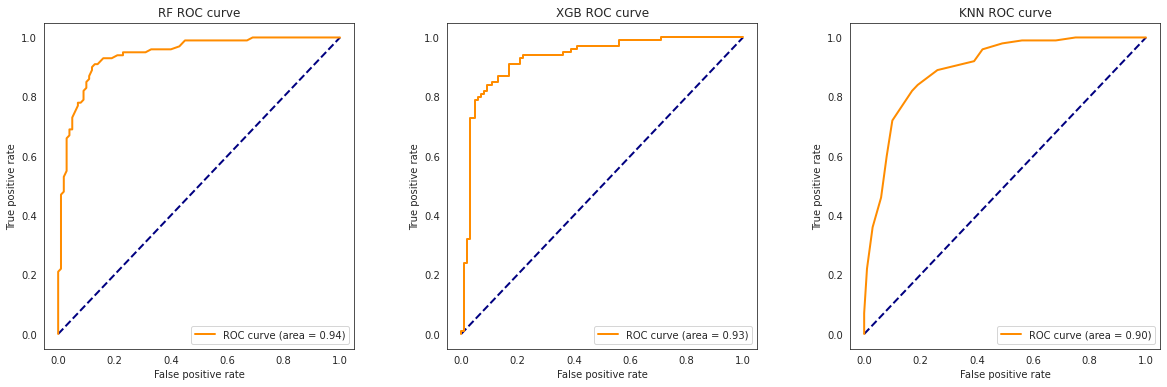

In [38]:
fig, axs = plt.subplots(1,3, figsize=(20, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=.3)
line_width = 2
axs = axs.ravel()

for i,models in list(enumerate(best_models)):
  name,model = models[0],models[1]
  y_pred,y_pred_proba = fit_pred(model)
  fpr, tpr, thresholds = roc_curve(y_validation, y_pred_proba)
  roc_auc = auc(fpr,tpr)
  roc_plotter(axs[i],fpr,tpr,line_width,name)
  
plt.show()

In [39]:
classify_metrics_df

,Model,AUC,Sensitivity,Specificity
0,RF,94.260,92.0,85.0
1,XGB,93.010,94.0,78.0
2,KNN,89.555,89.0,74.0


#####Final Analysis Based on the classification report: 
* ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g If a patient has a disease or no). Better models can accurately distinguish between the two. Whereas, a poor model will have difficulties in distinguishing between the two. This is quantified in the AUC Score.
* Also as discussed before the sensitivity score is important and we can consider 90% as a minimum benchmark.
* Once again we see as per the classification report, AUC score is best for Random forest model. This means the model is able to differentiate the best between the two classes in the data. And while it has a lower sensitivity score than XGB model. It has a much better specificity score. Further note that the sensitivity score is not significantly lower for Random Forest when compared to XGBoost model. Both models clear the benchmark level of 90% on sensitivity.
* KNN scored lower than both Random Forest and XGBoost model overall.
* Based on these metrics we can select Random forest model to be the optimal model for this problem.

##Data Reporting: Week 4



####2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a. Pie chart to describe the diabetic or non-diabetic population

b. Scatter charts between relevant variables to analyze the relationships

c. Histogram or frequency charts to analyze the distribution of the data

d. Heatmap of correlation analysis among the relevant variables

e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

#####Created the dashboard containing the required plots and metrics for business: 
Access the dashboard using the link: 
https://public.tableau.com/views/Capstone-HealthcarePGP-Diabetesdatadashboard/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link



Users can select from the following options in the dashboard -
Feature 1 , Feature 2 and Outcome Filter :<br>
* Feature 1 dropdown - Has all the features Age, BloodPressure, BMI, DiabetesPedigreeFunction, Glucose ,Insulin , Pregnancies, SkinThickness. Note these features can be used to control the visualisations on Bubble chart (across age groups), Histogram and the First variable for the Scatter plot.<br>
* Feature 2 dropdown - Has same feature selections as feature 1 but this is only to select the second variable for the scatter plot.<br>
* Outcome filter - This allows to filter the visualizations based on the outcomes (Diabetic/Non-Diabetic)

Following plots have been added to the dashboard:<br>
* Distribution of outcomes (Diabetic and Non-diabetic) in pie chart.<br>
* Scatter charts between variables - Feature 1 and Feature 2 can be selected to view the scatter plot relationship. Also contains color markings by outcome.<br>
* Histogram showing the distribution of the variable selected in feature 1. This has been color coded by Outcome.<br>
* Correlation heatmap among all pairs of variables. Refer note below on the data transformation done to create the correlation matrix in tableau.<br>
* Bubble chart to analyse different variables selected under Feature 1 across the age group bins. Bubbles are again color coded by outcome. The analysis shows the average values for the variables across the different age-groups.

#####Note for Part d: Creating a unpivoted version of the original dataset to plot correlation heatmap in tableau.
Created column - Variables(features) and the corresponding values in the Values column for each row_id(sample) which tableau will compare and compute the correlations pairwise for the features to build the heatmap

In [40]:
df_correlation = df.copy()
df_correlation["row_id"] = df.index +1
df_correlation = df_correlation[['row_id','Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                                  'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]
df_correlation = df_correlation.melt(id_vars=["row_id"],value_vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                                    'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],var_name="Variable",value_name ="Values")
df_correlation.to_excel("Correlation_diabetes_data_unpivot.xlsx")

Dashboard preview: 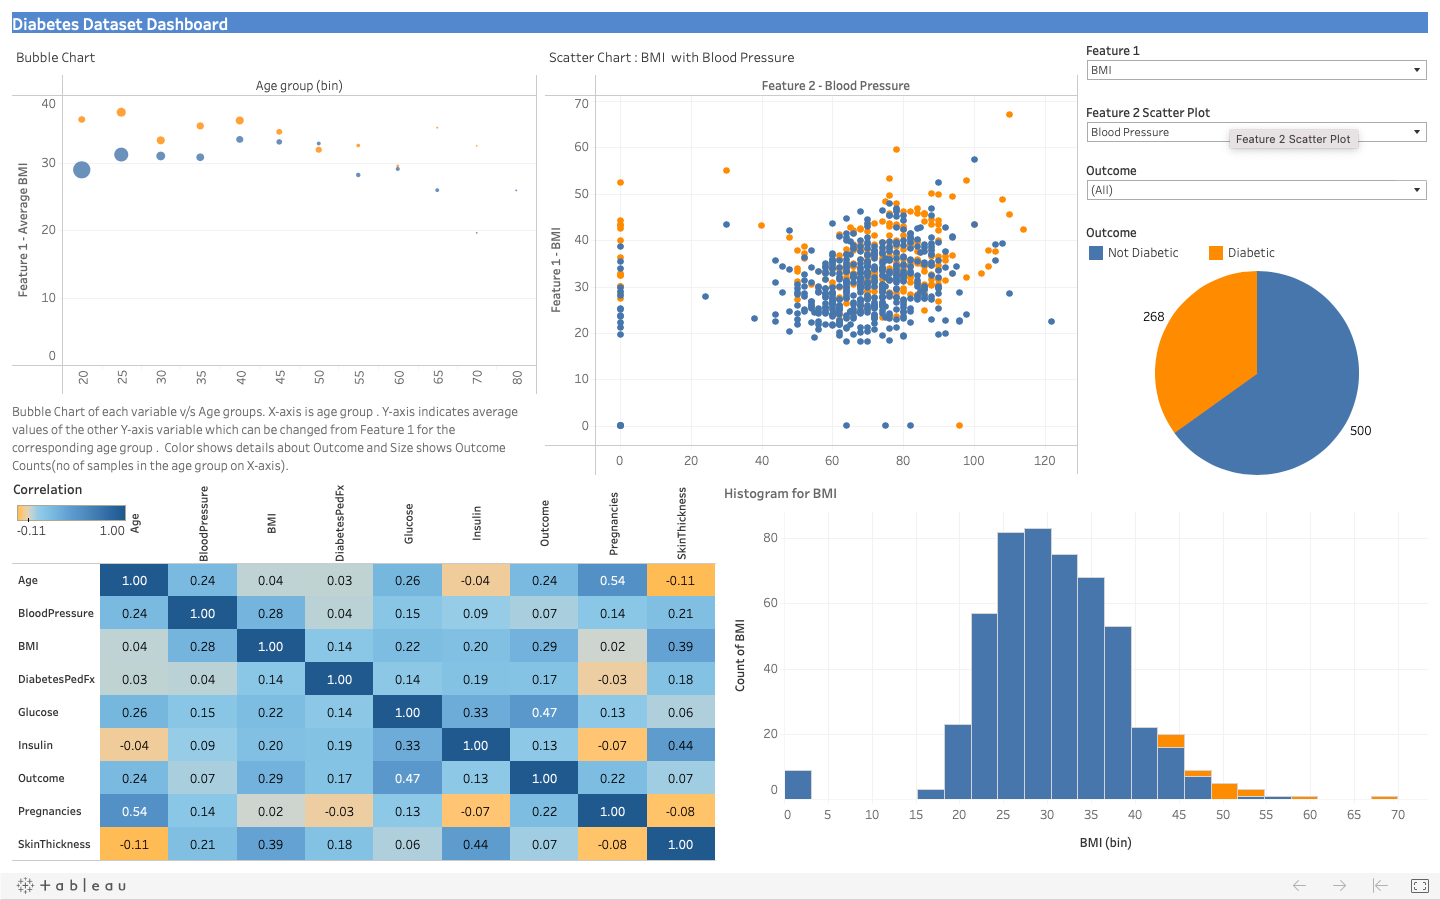